<a href="https://colab.research.google.com/github/hannasar/Playground_ML/blob/main/Classifying_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying images

### **Image classification** is the process of categorizing an image into a specific class or category. It is a common task in computer vision and involves analyzing an image and assigning it to one or more predefined categories.




## Classifing images using logistic regression

In logistic regression, a linear model is used to estimate the probability of an image belonging to a particular class. The output of the linear model is then passed through a logistic function to constrain the predicted probabilities to be between 0 and 1.

To use logistic regression for image classification, features are extracted from the images and used as input to the model. These features can be handcrafted, such as color histograms or texture descriptors, or learned automatically using techniques such as convolutional neural networks (CNNs). Once the features are extracted, they are fed into the logistic regression model to predict the probability of the image belonging to a particular class.

One limitation of logistic regression is that it may not be able to capture complex non-linear relationships in the image data. In such cases, more advanced techniques such as deep learning with convolutional neural networks (CNNs) are often used to achieve better performance. However, logistic regression can still be a useful technique in certain image classification scenarios, particularly when the number of classes is small and the image features are simple.

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
# There are 1797 images (8x8)
print("Image Data Shape", digits.data.shape)
# There are 1797 labels
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


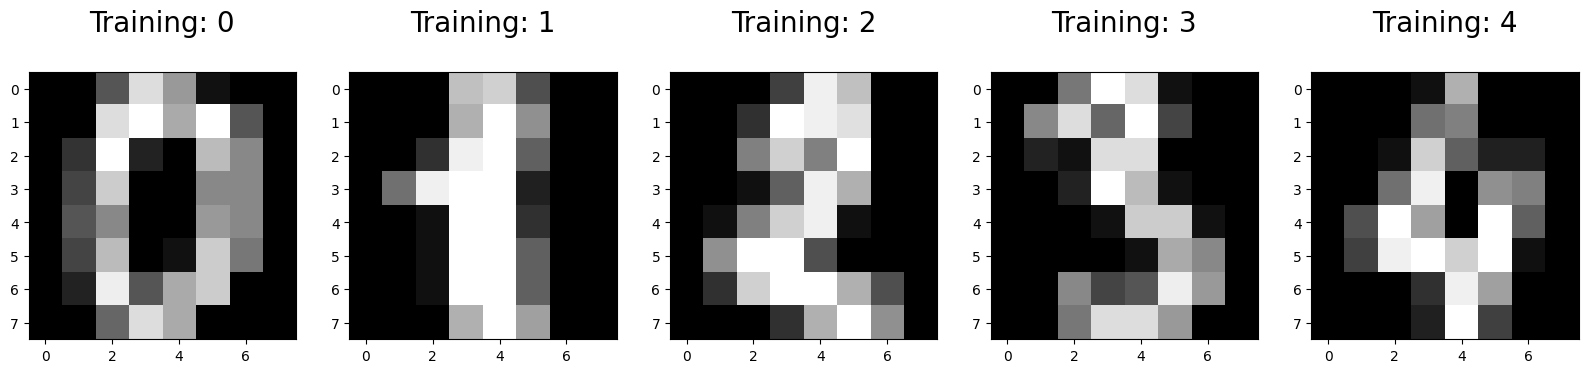

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1,5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title(f"Training: {label}\n", fontsize = 20)


In [6]:
# Let's split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=0) 

In [7]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
# default values + extended max_iter (default 100)
logisticRegr = LogisticRegression(max_iter=10000)
# training the model
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [8]:
# Prediction
predictions = logisticRegr.predict(x_test)
# How accurate it is?
score = logisticRegr.score(x_test, y_test)
print(score)

0.9555555555555556


### Summary:

**What**: Images Classyfication using Linear Regression

**When to use**: When you have linear relationships and small number of classes

**Type**: Supervised ML

**Goal**: Estimation the probability that the image belongs to a predefined category

**Library**: from sklearn.linear_model import LogisticRegression

## Using Support Vector Machines

In [9]:
# Import Classifiers
from sklearn.svm import SVC

Using a linear kernel

In [12]:
# linear kernel is used to create an SVM instance
svmClassifierLinear = SVC(kernel="linear")

In [13]:
# training the model
svmClassifierLinear.fit(x_train, y_train)

SVC(kernel='linear')

In [14]:
# predictions
predictionsSVMLinear = svmClassifierLinear.predict(x_test)

In [15]:
# accuracy of the model
scoreSVMLinear = svmClassifierLinear.score(x_test, y_test)
print(scoreSVMLinear)

0.9740740740740741


97%! About 2% better than LR

In [16]:
# now let's try poly kernel
svmClassifierPoly = SVC(kernel="poly")

In [17]:
svmClassifierPoly.fit(x_train, y_train)

SVC(kernel='poly')

In [18]:
scoreSVMPoly = svmClassifierPoly.score(x_test, y_test)
print(scoreSVMPoly)

0.9888888888888889


Now we got almost 99% accuracy!

In [19]:
# predictions
predictionsSVMPoly = svmClassifierPoly.predict(x_test)

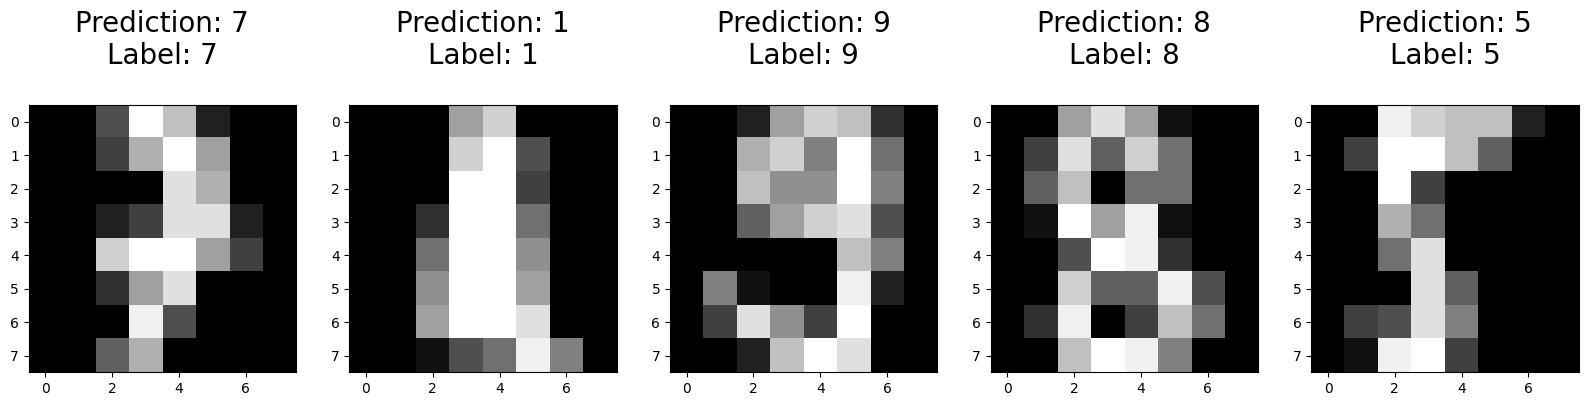

In [23]:
# let's check how accurate it is with visualization
plt.figure(figsize=(20,4))
for index, (image, prediction, label) in enumerate(zip(x_test[5:10], predictionsSVMPoly[5:10], y_test[5:10])):
  plt.subplot(1,5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title(f"Prediction: {prediction}\nLabel: {label}\n", fontsize = 20)